<a href="https://colab.research.google.com/github/hineri-san/project_Karimova/blob/main/%D0%BE%D1%82%D1%87%D0%B5%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Для запуска на тестовых данных необходимо скачать файл eda_all_recipes.csv и запустить notebook.

# Описание корпусов

Изначальный датасет --- предоставленный нам корпус с отзывами на рестораны (train_reviews), в котором содержится 284 отзыва. На основе этих отзывов выделены 4763 аспекта с соответствующими им оценками тональности (train_aspects).

Дополнительно использовался датасет с рецептами блюд, размещенными на сайте eda.ru. В датасете представлена информация о 40122 блюдах и наборах ингредиентов, необходимых для их приготовления.

# Использованные методы

В основу взят метод из бейзлайна --- используется частотный метод:

1. Берём все эксплицитные аспекты, выделенные в обучающих данных, выделяем их в тестовых текстах и приписываем самую частую категорию
2. Так же, но приписываем самую частую тональность
3. По всему документу оцениваем, какой тональности больше для каждой из категорий аспектов


## 1. Дополнение словаря названиями блюд из стороннего датасета

Данный эксперимент никакого положительного результата не принес. Проблема заключается, вероятно, в том, что названия блюд могут быть очень длинными и редко совпадают с информацией из отзывов (особенно учитывая, что авторы отзывов не очень внимательно и грамотно записывают названия блюд). Были произведены различные попытки выделить из длинных названий более короткие наборы, но каких-либо изменений в качестве разметки аспектов это не повлекло.

##2. Дополнение словаря названиями ингредиентов 

Основная проблема, возникающая при расширении датасета данными о блюдах --- неочевидно, какую тональность присваивать аспектам, выделенным на основе этих дополнительных данных. На основе обучающих данных было принято решение по умолчанию присваивать всем таким аспектам тональность 'positive', так как именно такая тональность в большинстве своем встречалась у аспектов Food в обучающих данных.

## 2.1 

Названия ингредиентов были лемматизированы. Получено 2353 уникальных названий продуктов. В первую очередь при разметке аспектов в новых отзывах ищем аспекты, выделенные в обучающих данных, затем ищем в дополнительных данных.

Результаты на тестовых данных:

Full match precision: 0.4071962949768436

Full match recall: 0.9605042016806723

Partial match ratio in pred: 0.48022800142500893

Full category accuracy: 0.39757748485928035

Partial category accuracy: 0.47167794798717494

Mention sentiment accuracy: 0.7987751531058618

Mention sentiment accuracy: 0.6146341463414634

Overall sentiment accuracy: 0.5380281690140845


Просмотр размеченных данных показал, что в качестве еды размечается что попало: предлоги, союзы и т.д., что негативно влияет на результаты.

## 2.2

Удалим из названий игредиентов стоп слова и все позиции длинной менее 3 символов. Получено 2324 уникальных названий продуктов.

Результаты на тестовых данных:

Full match precision: 0.521441605839416

Full match recall: 0.9605042016806723

Partial match ratio in pred: 0.614963503649635

Full category accuracy: 0.5091240875912408

Partial category accuracy: 0.6040145985401459

Mention sentiment accuracy: 0.7987751531058618

Mention sentiment accuracy: 0.6146341463414634

Overall sentiment accuracy: 0.5380281690140845


## 2.3 

В разметку из предыдущего пункта попали аспекты вроде "маленький" в категорию еды. Попробуем рассматривать только существительные среди добавленных названий ингредиентов. Для этого используем POS-tagging из MorphAnalyzer. Количество уникальных ингредиентов сократилось до 1471 наименования. К сожалению, пострадали и слова, которые потенциально должны размечаться, как Food --- свежевыжатый, нефильтрованный и т.п.

Результаты работы на тестовых данных:

Full match precision: 0.5448045757864634

Full match recall: 0.9605042016806723

Partial match ratio in pred: 0.6410867492850334

Full category accuracy: 0.5319351763584366

Partial category accuracy: 0.6296472831267874

Mention sentiment accuracy: 0.7987751531058618

Mention sentiment accuracy: 0.6089108910891089

Overall sentiment accuracy: 0.5408450704225352


Итоговое сравнение результатов представлено в таблице ниже:

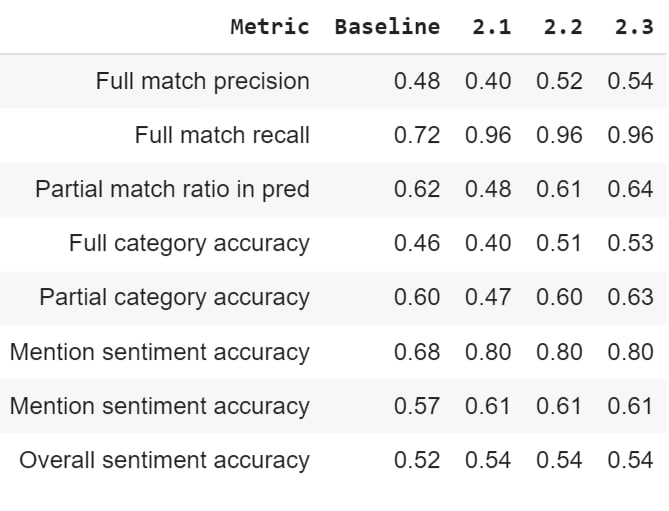

## Итоги

Благодаря изменениям метода из бейзлайна и добавлению дополнительных данных, получилось улучшить все показатели, даже без использования продвинутых моделей. Это произошло во многом потому, что предположения соответсвуют данным --- например, большинство появлений аспектов Food в тестовых данных указано с положительной тональностью, поэтому наша грубая разметка таких аспектов как по умолчанию позитивных, улучшает показатели работы на тестовых данных. Данная работа подтвердила прописные истины о важности предобработки данных и расширении датасетов в задачах NLP.